In [26]:
import numpy as np
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [16]:
X=np.array([[1,1],[2,1],[1,2],[1.5,1.5],[3,4],[2,5],[4,3],[7,2],[3,5],[2,6],[6,2],[3,4],[4,4]])
y=[0,1,0,0,1,1,1,1,1,1,1,1,1]


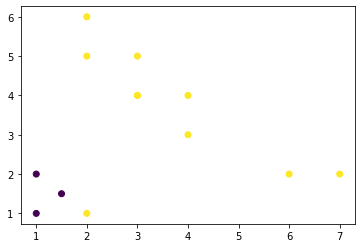

In [17]:
X_x1=X[:,0]
Y_y1=X[:,1]
plt.scatter(X_x1,Y_y1,c=y)
plt.show()

In [20]:
svcLinear=SVC(kernel='linear',C=1000).fit(X,y)
svcLinear.coef_,svcLinear.intercept_

(array([[3.99804688e+00, 2.22044605e-16]]), array([-6.99633789]))

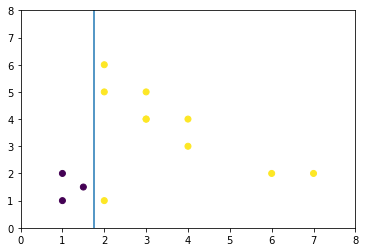

In [21]:
x1=np.array([0,5])
x2=-1*(svcLinear.intercept_+svcLinear.coef_[0][0]*x1)/svcLinear.coef_[0][1]
plt.plot(x1,x2)
plt.scatter(X_x1,Y_y1,c=y)
plt.axis([0,8,0,8])
plt.show()


In [28]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split


In [37]:
iris=datasets.load_iris()
x=iris.data[:,0:2]
y=iris.target

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [53]:
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [54]:
clf.score(x_test,y_test)

0.7368421052631579

In [55]:
def  makegrid(x1,x2,h=0.02):
    x1_min,x1_max=x1.min()-1,x1.max()+1
    x2_min,x2_max=x2.min()-1,x2.max()+1
    a=np.arange(x1_min,x1_max,h)
    b=np.arange(x2_min,x2_max,h)
    xx,yy=np.meshgrid(a,b)
    return xx,yy
    

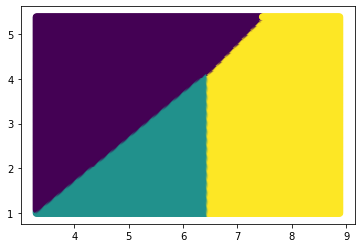

In [56]:
xx,yy=makegrid(x[:,0],x[:,1])
predictions=clf.predict(np.c_[xx.ravel(),yy.ravel()])
plt.scatter(xx.ravel(),yy.ravel(),c=predictions)
plt.show()

In [65]:
x1=np.array([1,3])
x2=np.array([4,6])
xx,yy=makegrid(x1,x2)
xx
yy
xx*yy.shape[0]

array([[  0.,   4.,   8., ..., 788., 792., 796.],
       [  0.,   4.,   8., ..., 788., 792., 796.],
       [  0.,   4.,   8., ..., 788., 792., 796.],
       ...,
       [  0.,   4.,   8., ..., 788., 792., 796.],
       [  0.,   4.,   8., ..., 788., 792., 796.],
       [  0.,   4.,   8., ..., 788., 792., 796.]])

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [70]:
clf=KNeighborsClassifier()
grid={"n_neighbors":[3,5,7,9,11]}
abc=GridSearchCV(clf,grid)
abc.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [71]:
abc.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [72]:
abc.cv_results_

{'mean_fit_time': array([0.01907325, 0.00073981, 0.00028772, 0.00101037, 0.00079618]),
 'std_fit_time': array([3.56287323e-02, 3.86563888e-04, 3.93881994e-04, 2.38358490e-05,
        3.98722570e-04]),
 'mean_score_time': array([0.00697012, 0.00358987, 0.00239305, 0.00183578, 0.00300307]),
 'std_score_time': array([3.78306679e-03, 4.87546979e-04, 4.87702961e-04, 7.62387440e-04,
        1.74195082e-05]),
 'param_n_neighbors': masked_array(data=[3, 5, 7, 9, 11],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11}],
 'split0_test_score': array([0.69565217, 0.65217391, 0.69565217, 0.65217391, 0.65217391]),
 'split1_test_score': array([0.82608696, 0.86956522, 0.86956522, 0.91304348, 0.86956522]),
 'split2_test_score': array([0.72727273, 0.81818182, 0.81818182, 0.77272727, 0.72727273]),
 'split3_test_score': array([0.72

In [73]:
clf=svm.SVC()
grid={"C":[1e2,1e3,5e3,1e4,5e4,1e5],"gamma":[1e-3,5e-4,1e-4,5e-3]}
abc=GridSearchCV(clf,grid)
abc.fit(x_train,y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [74]:
abc.best_estimator_

SVC(C=50000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [76]:
boston=datasets.load_boston()

In [77]:
x=boston.data
y=boston.target

In [79]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)


In [80]:
clf=svm.SVR(kernel="rbf")
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [81]:
clf.score(X_test,Y_test)

0.08369460247143334

In [82]:
clf=svm.SVR(kernel="linear")
clf.fit(X_train,Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [83]:
clf.score(X_test,Y_test)

0.5635479105806482

In [86]:
clf=svm.SVR()
grid={"C":[1e2,1e3,5e3,1e4,5e4,1e5],"gamma":[1e-3,5e-4,1e-4,5e-3]}
abc=GridSearchCV(clf,grid)
abc.fit(X_train,Y_train)
abc.best_estimator_

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [87]:
abc.score(X_test,Y_test)

0.6022138976857524

In [ ]:
import numpy as np
a = np.arange(1,3,0.2)
b = np.arange(4,6,0.2)
xx,yy = np.meshgrid(a,b)
print(xx)
print(yy)
print(xx*yy*xx.shape[0])